## (d)

In [94]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [0]:
plotly.tools.set_credentials_file(username='tonnioo',api_key='xfxa7pkOvzUiTjB3BWOG')

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

In [0]:
####COMENTÁRIO#####

#Deixei de dar alguns resultados e alguns plots específicos
#por causa da minha inexperiência com estatística
#e umas facilidades que o python não tem.
#Fora isso, tentei ao máximo conseguir resultados fiéis à realidade.

# 8. This question involves the use of simple linear regression on the Auto data set.


## (a)


Use the
lm()
function to perform a simple linear regression with
mpg
as the response and
horsepower
as the predictor. Use the
summary()
function to print the results. Comment on the output.



In [0]:
auto = pd.read_csv("https://www-bcf.usc.edu/~gareth/ISL/Auto.csv")

#problema: todos os valores de 'horsepower' estão como string, 
#e os valores nulos estão como '?' 
auto = auto.loc[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].apply(int)

df_x = pd.DataFrame(auto['horsepower'])
df_y = pd.DataFrame(auto['mpg'])

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,
                                                 random_state=1)

In [99]:
reg = linear_model.LinearRegression()

reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.6059927446641065

### For example:



**i,ii. Is there a relationship between the predictor and the response? 
 How strong is the relationship between the predictor and
the response?**


Sim, existe uma correlação de 60% segundo o coeficiente de determinação R².


**iii. Is the relationship between the predictor and the response
positive or negative?**


Negativa, pois quanto maior 'horsepower', menor 'mpg'

**iv. What is the predicted
mpg
associated with a
horsepower
of
98? What are the associated 95 % confidence and prediction
intervals?**

In [100]:
#predicted mpg 
x_predict = pd.DataFrame({'horsepower':[98]})
reg.predict(x_predict)

array([[24.2005222]])

In [101]:
#calculando o erro padrao
sum_list =(reg.predict(x_test) - y_test)**2
variance = (np.sum(sum_list)[0])/len(sum_list)
stderr = np.sqrt(variance)
print(stderr)

5.118102705551006


## (b) 

**Plot the response and the predictor. Use the
abline()
function
to display the least squares regression line.**

In [102]:
scatter_plot = go.Scatter(x=x_test,
                          y=y_test,
                          mode='markers')
line_plot = go.Scatter(x=x_train,
                       y=reg.predict(x_train),
                       mode='lines')
data = [scatter_plot,
        line_plot]
py.iplot(data)

## (c)

**Use the
plot()
function to produce diagnostic plots of the least
squares regression fit. Comment on any problems you see with
the fit.**

A regressão possui poder preditivo limitado, é possível observar *outliers* no gráfico. O gráfico de dispersão também sugere que uma regressão polinomial seria mais apropriada (underfitting).

# 9. This question involves the use of multiple linear regression on the Auto data set.

## (a)

Produce a scatterplot matrix which includes all of the variables
in the data set.

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


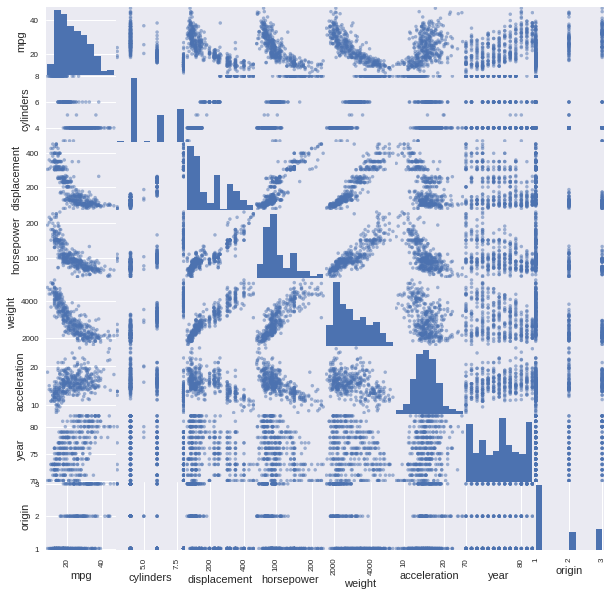

In [103]:
pd.plotting.scatter_matrix(auto,figsize=(10,10))
print(auto.columns.tolist())

## (b)

Compute the matrix of correlations between the variables using
the function
cor()
. You will need to exclude the
name
variable,
cor()
which is qualitative.

In [104]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##(c)

Use the
lm()
function to perform a multiple linear regression
with
mpg
as the response and all other variables except
name
as
the predictors.Use the
summary()
function to print the results.
Comment on the output. 

In [0]:
df_x = pd.DataFrame(auto.loc[:,['cylinders','displacement','horsepower','weight','acceleration','year','origin']])
df_y = pd.DataFrame(auto['mpg'])

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,
                                                 random_state=1)

In [106]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

0.8173705034988942

### For instance:

i. Is there a relationship between the predictors and the response?


Sim, o número de preditores aumentou a acurácia do modelo.

ii. Which predictors appear to have a statistically significant
relationship to the response?


In [107]:
#simple lists (0 dim)
columns = df_x.columns
slopes = reg.coef_[0] 

for i in range(len(columns)):
  print(f"{columns[i]}: {slopes[i]},")

cylinders: -0.20597754591506173,
displacement: 0.019638672533403297,
horsepower: -0.0016160104218734199,
weight: -0.0072828774806608775,
acceleration: 0.2818661501356889,
year: 0.742797516559533,
origin: 1.3809037235552608,


iii. What does the coefficient for the
year
variable suggest?

Carros lançados mais recentemente têm em média maior consumo de galões por milha.

##(d)

Use the
plot()
function to produce diagnostic plots of the linear
regression fit. Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers? Does
the leverage plot identify any observations with unusually high
leverage?

In [108]:
df_residual = y_test - reg.predict(x_test)
residual_scatter =  go.Scatter(x= np.array(range(len(df_residual))),
                               y= df_residual,
                               mode='markers')
data = [residual_scatter]
py.iplot(data)
#diferença entre estimado/real plotado como distancia do eixo x

In [109]:
#os maiores outliers são:
df_residual.loc[df_residual['mpg']>= 10]

,mpg
309,10.266031
326,11.132126
329,10.220567


# 10. This question should be answered using the Carseats data set

##(a)

Fit a multiple regression model to predict
Sales
using
Price
,
Urban
,and
US
.


In [0]:
carseats = pd.read_csv("https://raw.githubusercontent.com/tonnioo/scripts_e_vagabundagens/master/Carseats.csv")

df_x = pd.DataFrame(carseats.loc[:,['Price','Urban','US']])
df_y = pd.DataFrame(carseats['Sales'])

df_x = pd.get_dummies(df_x,drop_first=True)

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=1)

In [111]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.2848578202657208

##(b)

Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!


In [112]:
print(df_x.columns.tolist())
print(reg.coef_.tolist()[0])

['Price', 'Urban_Yes', 'US_Yes']
[-0.05258367239852627, -0.05805784871304398, 1.116252501248967]


A variável com maior efeito é a US (pois é qualitativa). 

O preço afeta negativamente na quantidade de vendas.

O fato de ser uma área urbana ou não não afeta tanto nas vendas.

##(c)

Write out the model in equation form, being careful to handle
the qualitative variables properly.


In [113]:
x_intercept = pd.DataFrame({'Price': [0],'Urban_Yes': [0],'US_Yes': [0]})

b0 = reg.predict(x_intercept)[0][0]
b1,b2,b3 = reg.coef_.tolist()[0]
x1,x2,x3 = [df_x['Price'],df_x['Urban_Yes'],df_x['US_Yes']]

x1.tolist();x2.tolist();x3.tolist()

yi = b0 + x1*b1 + x2*b2 + x3*b3
yi.head()

0    7.637376
1    9.582972
2    9.740723
3    8.846800
4    6.100454
dtype: float64

##(d)

For which of the predictors can you reject the null hypothesis

*H0 : β1=0? *


The Urban variable can be discarded

## (e)

On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [114]:
df_x = df_x.drop(['Urban_Yes'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=1)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.28512926017033446

## (f)

How well do the models in **(a)** and **(e)** fit the data?


Nenhum dos dois possui um bom poder preditivo.

Using the model from **(e)**, obtain 95 % confidence intervals for the coefficient(s).


## (i)


Is there evidence of outliers or high leverage observations in the
model from **(e)**?

In [115]:
df_residual = y_test - reg.predict(x_test)
residual_scatter =  go.Scatter(x= np.array(range(len(df_residual))),
                               y= df_residual,
                               mode='markers')
data = [residual_scatter]
py.iplot(data)

Sim, dadas as dimensões da variável dependente, é possível observar a presença de outliers.

# 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (a) to ensure consistent results.

## (a)

Using the `rnorm()`
function, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, **X**.

In [0]:
x = np.random.normal(0,0.1,100)

## (b)

Using the
`rnorm()`
function, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.

In [117]:
eps = np.random.normal(0,0.25,100)
np.mean(eps)

0.018235734370760818

## (c)

Using
x
and
eps, generate a vector
y
according to the model Yi
=
−1 + 0.5x
+
ε.

What is the length of the vector
y? What are the values of
β0
and
β1
in this linear model?

In [0]:
yi = -1 + 0.5*x + np.mean(eps) #isso provavelmente tá errado

β0= -1 β1=0.5

## (d)

Create a scatterplot displaying the relationship between
x
and
y. Comment on what you observe.

In [119]:
scatter_plot = go.Scatter(x=x,
                          y=yi,
                          mode='markers')
data=[scatter_plot]
py.iplot(data)

x e y possuem uma correlação linear perfeita, com 0 de erro.

## (e)

Fit a least squares linear model to predict
y
using
x. Comment
on the model obtained. How do the estimated
β0
and
β1
compare to
β0
and
β1
?

In [120]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(yi)


x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=1)
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

1.0

A correlação é perfeita, os coeficientes estimados são iguais os reais.

## (f)

Display the least squares line on the scatterplot obtained in **(d)**.
Draw the population regression line on the plot, in a different
color. Use the
`legend()`
command to create an
appropriate legend.

In [121]:
scatter_plot = go.Scatter(x=x_test,
                          y=y_test,
                          mode='markers')

y = list()
for i in reg.predict(x_test).tolist():
  y.append(i[0])


line_plot = go.Scatter(x=x_test,
                       y=y,
                       mode='lines')

y
data=[scatter_plot,line_plot]
py.iplot(data)

## (g)

Now fit a polynomial regression model that predicts
y
using
x
and
x². Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [0]:
x = df_x.values.reshape(1,-1)[0]
y = df_y.values.reshape(1,-1)[0]

reg = np.polyfit(x,y,3) #estima um modelo ols polinomial de grau 2 (ax^2+bx+c)
f = np.poly1d(reg) #instancia um objeto para polinomios do numpy

yhat = f(x)

Os valores preditos não são melhores em relação aos valores reais. Porque estes possuem uma distribuição linear, e não polinomial

## (h)

Repeat **(a)–(f)** after modifying the data generation process in
such a way that there is
less
noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
in **(b)**. Describe your results.

## (i)

Repeat **(a)–(f)** after modifying the data generation process in
such a way that there is
more
noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term

in **(b)**. Describe your results.

## (j)

What are the confidence intervals for
β0
and
β1
based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

## (a)

For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/tonnioo/scripts_e_vagabundagens/master/Boston.csv')
df = df.iloc[:,1:]

y = df['medv']

reg = linear_model.LinearRegression()
for column in df.columns:

  x = np.array([[i] for i in df[column].values])
  reg.fit(x,y)
  print(column,':',reg.score(x,y))

crim : 0.15078046904975717
zn : 0.12992084489428946
indus : 0.2339900304444752
chas : 0.03071612970877491
nox : 0.182603042501699
rm : 0.4835254559913343
age : 0.14209474407780442
dis : 0.06246437212178257
rad : 0.14563857991232532
tax : 0.2195259210442193
ptratio : 0.257847318009223
black : 0.11119611824636277
lstat : 0.5441462975864797
medv : 1.0


'rm' e 'lstat' possuem poder preditivo relevante.

In [0]:
rm = np.array([[i] for i in df['rm'].values])
lstat = np.array([[i] for i in df['lstat'].values])
y = df['medv']

reg1 = linear_model.LinearRegression()
reg1.fit(rm,y)
yhat_rm = reg1.predict(rm)

reg2 = linear_model.LinearRegression()
reg2.fit(lstat,y)
yhat_lstat = reg2.predict(lstat)

In [126]:
scatter_rm = go.Scatter(x= rm,
                        y= y,
                        mode='markers')
scatter_lstat = go.Scatter(x= lstat,
                        y= y,
                        mode='markers')

rm_reg_line = go.Scatter(x= rm,
                        y=yhat_rm,
                        mode='lines')
lstat_reg_line = go.Scatter(x=lstat,
                           y=yhat_lstat,
                           mode='lines')

fig = plotly.tools.make_subplots(rows=1, cols=2)
fig.append_trace(scatter_rm, 1, 1)
fig.append_trace(rm_reg_line,1,1)

fig.append_trace(scatter_lstat, 1, 2)
fig.append_trace(lstat_reg_line,1,2)

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## (b)

Fit a multiple regression model to predict the response using
all of the predictors. Describe you
r results. For which predictors
can we reject the null hypothesis
H0:β1
=0?

In [0]:
df.columns

In [0]:
import statsmodels.formula.api as sms

sms_reg = sms.ols(formula='medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv',data= df).fit()
sms_reg.summary()

## (c)

How do your results from **(a)** compare to your results from **(b)**?
Create a plot displaying the uni
variate regression coefficients
from **(a)** on the
x-axis, and the multiple regression coefficients
from **(b)** on the
y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-sion model is shown on the
x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the
y-axis.

## (d)

Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor x, fit a model of the form

y=β0 + β1x + β2x² + β3x³ + ε.